In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

ruta_limpia = '../data/MX_videos_limpio.csv'
df = pd.read_csv(ruta_limpia, parse_dates=['trending_date']) # parse_dates para leer la fecha correctamente

time_series_df = df.groupby('trending_date')['views'].sum().reset_index()
time_series_df = time_series_df.rename(columns={'trending_date': 'date', 'views': 'total_views'})

time_series_df = time_series_df.sort_values(by='date')

print("Serie de tiempo creada exitosamente:")
time_series_df.head()

Serie de tiempo creada exitosamente:


,date,total_views
0,2017-11-14,40460541
1,2017-11-15,38412585
2,2017-11-16,45622272
3,2017-11-17,48059952
4,2017-11-18,67296433


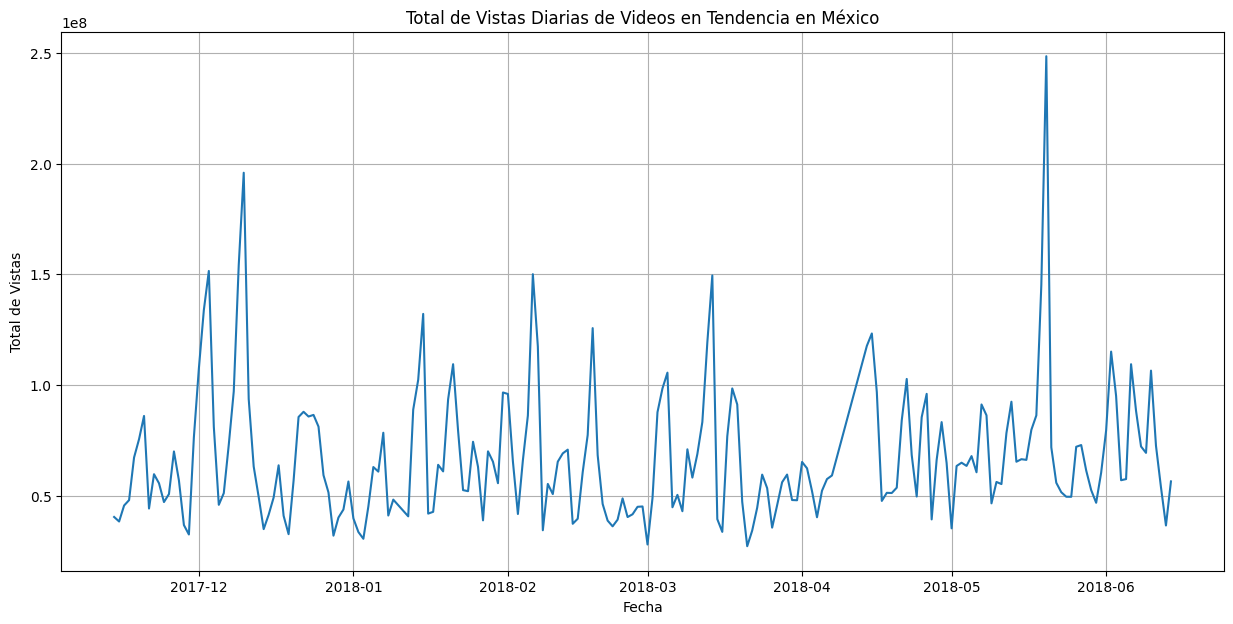

In [2]:
plt.figure(figsize=(15, 7))
plt.plot(time_series_df['date'], time_series_df['total_views'])
plt.title('Total de Vistas Diarias de Videos en Tendencia en México')
plt.xlabel('Fecha')
plt.ylabel('Total de Vistas')
plt.grid(True)
plt.show()

In [3]:
time_series_df['time_index'] = (time_series_df['date'] - time_series_df['date'].min()).dt.days

X = time_series_df[['time_index']] 
y = time_series_df['total_views']   

print("Feature 'time_index' creada:")
time_series_df.head()

Feature 'time_index' creada:


,date,total_views,time_index
0,2017-11-14,40460541,0
1,2017-11-15,38412585,1
2,2017-11-16,45622272,2
3,2017-11-17,48059952,3
4,2017-11-18,67296433,4


In [4]:
model = LinearRegression()
model.fit(X, y)

y_pred_trend = model.predict(X)

print("Modelo de regresión lineal entrenado sobre la serie de tiempo.")

Modelo de regresión lineal entrenado sobre la serie de tiempo.


In [5]:
last_time_index = X.iloc[-1]['time_index']
future_time_index = np.array(range(last_time_index + 1, last_time_index + 31)).reshape(-1, 1)

future_predictions = model.predict(future_time_index)

last_date = time_series_df['date'].max()
future_dates = pd.to_datetime([last_date + pd.DateOffset(days=i) for i in range(1, 31)])
future_df = pd.DataFrame({'date': future_dates, 'predicted_views': future_predictions})

print("Predicciones para los próximos 30 días:")
print(future_df)

Predicciones para los próximos 30 días:
         date  predicted_views
0  2018-06-15     7.142743e+07
1  2018-06-16     7.146333e+07
2  2018-06-17     7.149923e+07
3  2018-06-18     7.153513e+07
4  2018-06-19     7.157103e+07
5  2018-06-20     7.160693e+07
6  2018-06-21     7.164284e+07
7  2018-06-22     7.167874e+07
8  2018-06-23     7.171464e+07
9  2018-06-24     7.175054e+07
10 2018-06-25     7.178644e+07
11 2018-06-26     7.182234e+07
12 2018-06-27     7.185824e+07
13 2018-06-28     7.189414e+07
14 2018-06-29     7.193004e+07
15 2018-06-30     7.196594e+07
16 2018-07-01     7.200184e+07
17 2018-07-02     7.203774e+07
18 2018-07-03     7.207364e+07
19 2018-07-04     7.210954e+07
20 2018-07-05     7.214544e+07
21 2018-07-06     7.218134e+07
22 2018-07-07     7.221724e+07
23 2018-07-08     7.225314e+07
24 2018-07-09     7.228904e+07
25 2018-07-10     7.232494e+07
26 2018-07-11     7.236084e+07
27 2018-07-12     7.239674e+07
28 2018-07-13     7.243264e+07
29 2018-07-14     7.246854e+07

c:\Users\frank\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


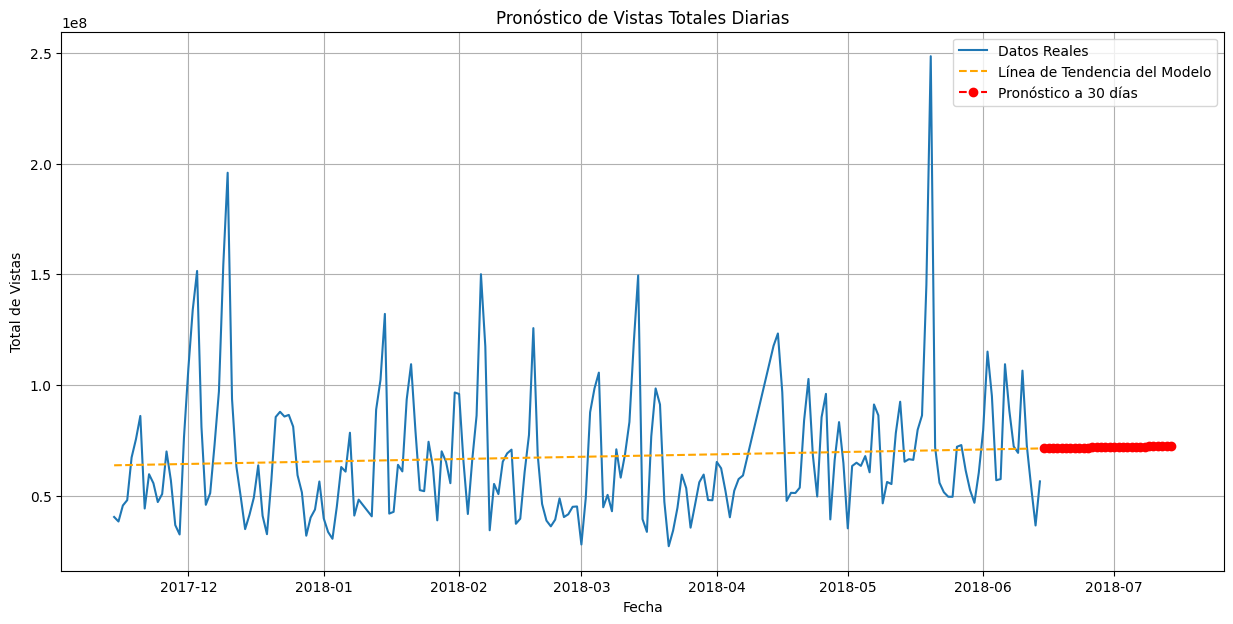

In [6]:
plt.figure(figsize=(15, 7))

plt.plot(time_series_df['date'], y, label='Datos Reales')
plt.plot(time_series_df['date'], y_pred_trend, color='orange', linestyle='--', label='Línea de Tendencia del Modelo')
plt.plot(future_df['date'], future_df['predicted_views'], color='red', linestyle='--', marker='o', label='Pronóstico a 30 días')

plt.title('Pronóstico de Vistas Totales Diarias')
plt.xlabel('Fecha')
plt.ylabel('Total de Vistas')
plt.legend()
plt.grid(True)
plt.show()